# MelanomAI

El diagnóstico de los diversos tipos de lesiones cutáneas en muchas ocasiones pasan desapercibidas al ojo clínico ya que, en ciertas ocasiones, suelen ser muy difíciles de identificar que conlleva a un diagnóstico incorrecto por parte del personal sanitario.

__MelanomAI__ es un modelo inteligente que implementa una red neuronal convolutiva (_CNN_) con el fin de diagnósticar hasta 8 tipos diferentes de lesiones cutáneas. 

En primer lugar cargamos las librerías de _TensorFlow_, _Keras_, _Numpy_ y _Matplotlib_.

In [0]:
import tensorflow as tf

from tensorflow.keras.models                import Sequential, Model, load_model
from tensorflow.keras.layers                import Dense, Input, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.layers                import Conv2DTranspose, UpSampling2D, MaxPooling2D, Reshape, Activation, ReLU
from tensorflow.keras.preprocessing.image   import ImageDataGenerator
from tensorflow.keras.utils                 import to_categorical
from tensorflow.keras.optimizers            import Adam
from sklearn.metrics                        import confusion_matrix 
import itertools

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

#from api.isic_api import ISICApi
#!rm -rf dataset/train/DatosExtra

Cargamos las carpeta del Drive con los archivos del proyecto.

In [48]:
from google.colab import drive
drive.mount('/content/drive')

#!unzip /content/drive/My\ Drive/Trabajo\ Machine\ Learning/dataset_8.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Diseño de la arquitectura

A continuación, se instancia el directorio base donde encontramos el dataset de imágenes de lesiones cutáneas tomadas del _International Skin Imaging Collaboration_ (_ISIC_). Visualizamos una de una de las imágenes de la clase de melanoma para tener una primera visual de lso datos.

In [49]:
#api = ISICApi(username="david00medina", password="ISIC123")

# Ruta del directorio del dataset
DATASET_PATH = 'dataset/'

#visualizamos una imagen
img = mpimg.imread(DATASET_PATH + "train/MEL/ISIC_0070815.jpg")
plt.axis("off")
plt.imshow(img)
plt.show()

FileNotFoundError: ignored

Se cargan los datos de entrenamiento (_X_) y test (_Y_) que serán utilizados en sendos procesos. 

In [50]:
# Cargamos los datos de entrenamiento y test

datagen = ImageDataGenerator(rescale=1./255)
X_data_directory = datagen.flow_from_directory(DATASET_PATH + "/train" ,target_size=(300,300), batch_size=32, class_mode='categorical')

datagen2 = ImageDataGenerator(rescale=1./255)
Y_data_directory = datagen2.flow_from_directory(DATASET_PATH +  '/test' ,target_size=(300,300), batch_size=512, class_mode='categorical')


Found 12873 images belonging to 8 classes.
Found 2916 images belonging to 8 classes.


Creamos la red neuronal convolutiva (_CNN_) que llevará a cabo el proceso de clasificación de lesiones convolutivas.

In [0]:
#Creamos el modelo
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(300,300,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(64))
model.add(Dense(8, activation='softmax'))


model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(0.0001, beta_1=0.9, beta_2=0.999), 
              metrics=['accuracy'])

model.summary()

W0712 16:20:06.599209 140714595448704 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
activation (Activation)      (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        1

Inicializamos el entrenamiento de nuestro modelo.

In [0]:
#model.save('cnn_1/ccn1.h5')
#!mkdir saved_models
cp_callback = tf.keras.callbacks.ModelCheckpoint('saved_models/ccn1.h5', 
                                                 monitor='val_acc',
                                                 verbose=1)
model.fit_generator( X_data_directory, steps_per_epoch=20, epochs=20, 
                    validation_data=Y_data_directory, validation_steps=10,
                   callbacks=[cp_callback])


mkdir: cannot create directory ‘saved_models’: File exists
Epoch 1/20
19/20 [===========================>..] - ETA: 2s - loss: 2.0792 - acc: 0.1184
Epoch 00001: saving model to saved_models/ccn1.h5
20/20 [==============================] - 66s 3s/step - loss: 2.0776 - acc: 0.1234 - val_loss: 2.0964 - val_acc: 0.1281
Epoch 2/20
19/20 [===========================>..] - ETA: 2s - loss: 2.0841 - acc: 0.1069
Epoch 00002: saving model to saved_models/ccn1.h5
20/20 [==============================] - 65s 3s/step - loss: 2.0846 - acc: 0.1125 - val_loss: 2.0882 - val_acc: 0.1281
Epoch 3/20
19/20 [===========================>..] - ETA: 2s - loss: 2.0785 - acc: 0.1218
Epoch 00003: saving model to saved_models/ccn1.h5
20/20 [==============================] - 63s 3s/step - loss: 2.0790 - acc: 0.1203 - val_loss: 2.0919 - val_acc: 0.1219
Epoch 4/20
19/20 [===========================>..] - ETA: 2s - loss: 2.0748 - acc: 0.1509
Epoch 00004: saving model to saved_models/ccn1.h5
20/20 [=====================

## Predicción y resultados

Cargamos el modelo del __Google Drive__.

In [0]:
trained_model = load_model('/content/drive/My Drive/Trabajo Machine Learning/weights/ccn1.h5')

Función utilizada para imprimir todas las imágenes de un batch con sus etiquetas asociadas. Se plotea una pequeña muestra de las imágenes de test con su predicción asociada.

In [0]:
def plots(ims, figsize=(100,100), rows=1, interp=False, titles=None):
  class_name = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC']
  if type(ims[0]) is np.ndarray:
    ims = np.array(ims).astype(np.uint8)
    if (ims.shape[-1] != 3):
      ims = ims.transpose((0,2,3,1))
      
  f = plt.figure(figsize=figsize)
  
  cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows+1
  for i in range(len(ims)):
    sp = f.add_subplot(rows, cols, i+1)
    sp.axis('Off')
    
    j = np.where(titles[i]==1)[0][0]
    if titles is not None:
      sp.set_title(class_name[j], fontsize=16)
    plt.imshow(ims[i], interpolation=None if interp else 'none')

In [53]:
datagen3 = ImageDataGenerator(rescale=1./255)
test_batches = datagen3.flow_from_directory('/content/drive/My Drive/Trabajo Machine Learning/train_f',target_size=(300,300), batch_size=128, class_mode='categorical')

Found 2853 images belonging to 8 classes.


In [0]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Matriz de confusión (VGG16)', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  if normalize:
    cm= cm.astype('float') / cm.sum(azis=1)[:, np.newaxis]
    print('Matrix de confusión normalizada')
  else:
    print('Matriz de confusión sin normalizar')
    
  print(cm)
  
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j],
              horizontalalignment='center',
              color='white' if cm[i,j] > thresh else 'black')
              
  plt.tight_layout()
  plt.ylabel('Diagnóstico correcto')
  plt.xlabel('Diagnóstico predicho')

In [0]:
def success_rate(test_batches, rep):
  predictions = np.array(model.predict_generator(test_batches, steps=rep, verbose=0))
  plots(test_img*255, titles=test_labels)
  
  labels = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC']
  
  success = 0
  mel = 0
  nv = 0
  bcc = 0
  ak = 0
  bkl = 0
  df = 0
  vasc = 0
  scc = 0
  
  next = 0
  
  for i in range(rep):
    rounded
    for i, j in zip(rounded_pred, rounded_test_labels):
      if i == j:
        success = success + 1
  
    test_img, temp_label =  next(test_batches)
    test_labels.concatenate(temp_label, axis=0)
    print(test_labels)
    
  rounded_test_labels = np.argmax(test_labels, axis=1)
  rounded_pred = np.argmax(predictions, axis=1).tolist()
  cm = confusion_matrix(rounded_test_labels, rounded_pred)
  
  print("Test accuracy: ", success/(len(rounded_test_labels) * 128)*100, '%')
  return cm

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


UnboundLocalError: ignored

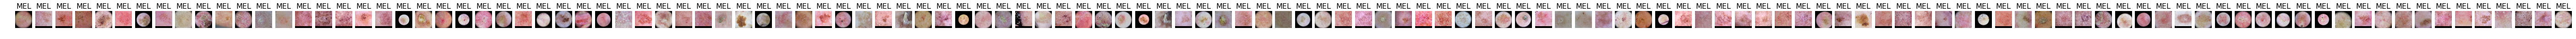

In [0]:
labels = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC']

cm = success_rate(test_batches, 30)

Matriz de confusión sin normalizar
[[   0    0    0    5  426    0]
 [   0    0    0   10 1307    1]
 [   0    0    0    7  581    0]
 [   0    0    0    0    0    0]
 [   0    0    0    6  427    3]
 [   0    0    0    2  295    2]]


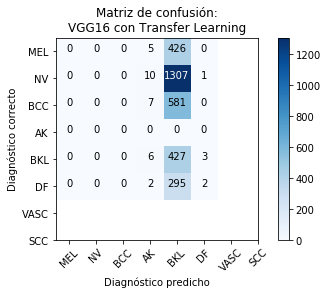

In [0]:
plot_confusion_matrix(cm, labels, title='Matriz de confusión:\nVGG16 con Transfer Learning')